<a href="https://colab.research.google.com/github/gaurav-pal19/Case-Study-s/blob/master/Sports_Analytics_Baseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One of the most compelling stories of sports analytics made popular by the 2011 movie Moneyball, the Oakland Athletics team of 2002 created history by winning 20 consecutive games between August 13 and September 2002.
Much of the Oakland Athletics (popularly referred to as the A’s) success in that season is attributed to their General Manager, Billy Beane and former Assistant General Manager, Paul DePodesta.

DePodesta, a graduate in Economics from Harvard University joined the A’s in 1999 and quickly started incorporating analysis of baseball statistics to value and purchase players.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#RA - Runs Allowed
#RS - Runs Scored
#OBP - On Base Percentage
#SLG - Slugging Percentage
#BA - Batting Average
#OOBP - Opponent's OBP
#OSLG - Opponent's SLG
#W - No of wins in that season
#Statistical Analysis Clip from Moneyball (2011)

In [7]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/GL/baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [8]:
df.shape

(1232, 15)

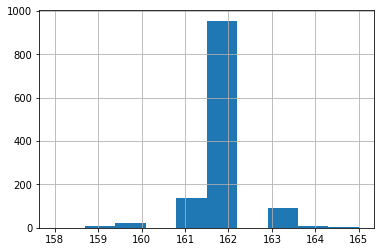

In [9]:
df['G'].hist()

In [10]:
df.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Year,1.000000,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.385219,0.443967,0.009287,-0.371869,-0.345667
RS,0.418978,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,-0.027687,0.210963,0.075195,0.133981,0.193426
RA,0.412020,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.399141,0.315128,-0.023369,0.910344,0.909319
W,0.004138,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.755098,-0.198960,0.105309,-0.634315,-0.568490
OBP,0.374354,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.001612,0.175349,0.016563,0.120349,0.153372
SLG,0.536037,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.126663,0.271893,0.036770,0.143861,0.210423
BA,0.349397,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.035452,0.092684,0.019886,0.187108,0.227808
Playoffs,0.145779,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,NaN,NaN,0.022208,-0.433572,-0.366744
RankSeason,0.385219,-0.027687,0.399141,-0.755098,0.001612,0.126663,0.035452,NaN,1.000000,0.266906,0.069222,0.097731,0.050111
RankPlayoffs,0.443967,0.210963,0.315128,-0.198960,0.175349,0.271893,0.092684,NaN,0.266906,1.000000,0.007820,0.065808,0.087089


In [11]:
df['RD']=df['RS']-df['RA']
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [12]:
df.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
Year,1.000000e+00,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.385219,0.443967,0.009287,-0.371869,-0.345667,2.182660e-18
RS,4.189775e-01,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,-0.027687,0.210963,0.075195,0.133981,0.193426,5.462938e-01
RA,4.120202e-01,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.399141,0.315128,-0.023369,0.910344,0.909319,-5.670477e-01
W,4.138248e-03,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.755098,-0.198960,0.105309,-0.634315,-0.568490,9.378511e-01
OBP,3.743545e-01,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.001612,0.175349,0.016563,0.120349,0.153372,5.063794e-01
SLG,5.360371e-01,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.126663,0.271893,0.036770,0.143861,0.210423,4.228647e-01
BA,3.493972e-01,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.035452,0.092684,0.019886,0.187108,0.227808,4.369427e-01
Playoffs,1.457787e-01,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,NaN,NaN,0.022208,-0.433572,-0.366744,5.810944e-01
RankSeason,3.852191e-01,-0.027687,0.399141,-0.755098,0.001612,0.126663,0.035452,NaN,1.000000,0.266906,0.069222,0.097731,0.050111,-5.806451e-01
RankPlayoffs,4.439670e-01,0.210963,0.315128,-0.198960,0.175349,0.271893,0.092684,NaN,0.266906,1.000000,0.007820,0.065808,0.087089,-1.312351e-01


In [13]:
#To replicate the data prior to 2002 season
df1=df[df['Year']<2002]
df1.shape

(902, 16)

In [14]:
df1.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
Year,1.000000e+00,0.485502,0.483072,0.002756,0.474799,0.517828,0.438729,0.113014,0.415645,0.426403,-0.027085,-0.335533,-0.122668,-4.316055e-19
RS,4.855023e-01,1.000000,0.415014,0.507382,0.904909,0.926384,0.831625,0.371631,0.135743,0.323624,0.056206,0.091057,0.039787,5.375395e-01
RA,4.830717e-01,0.415014,1.000000,-0.507772,0.367105,0.459514,0.350411,-0.241213,0.539387,0.382416,-0.037402,0.909908,0.895110,-5.441052e-01
W,2.755645e-03,0.507382,-0.507772,1.000000,0.474080,0.405972,0.416391,0.588978,-0.747960,-0.235038,0.108128,-0.633657,-0.646920,9.385150e-01
OBP,4.747989e-01,0.904909,0.367105,0.474080,1.000000,0.806154,0.854055,0.345530,0.146153,0.300446,-0.003827,0.052899,-0.008316,4.942505e-01
SLG,5.178276e-01,0.926384,0.459514,0.405972,0.806154,1.000000,0.814068,0.300191,0.217315,0.341013,0.012873,0.101632,0.080376,4.284077e-01
BA,4.387291e-01,0.831625,0.350411,0.416391,0.854055,0.814068,1.000000,0.278772,0.156881,0.229791,-0.001805,0.219021,0.231918,4.421417e-01
Playoffs,1.130136e-01,0.371631,-0.241213,0.588978,0.345530,0.300191,0.278772,1.000000,NaN,NaN,0.009831,-0.495725,-0.510097,5.662745e-01
RankSeason,4.156449e-01,0.135743,0.539387,-0.747960,0.146153,0.217315,0.156881,NaN,1.000000,0.352961,0.052870,0.141905,0.235886,-5.703690e-01
RankPlayoffs,4.264030e-01,0.323624,0.382416,-0.235038,0.300446,0.341013,0.229791,NaN,0.352961,1.000000,0.012394,0.299376,0.318576,-7.677988e-02


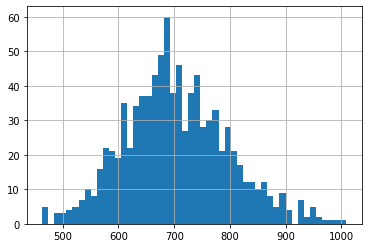

In [15]:
#find insights regarding the distributions of the numerical variables
df1['RS'].hist(bins=50)

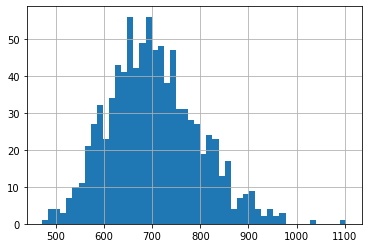

In [16]:
df1['RA'].hist(bins=50)

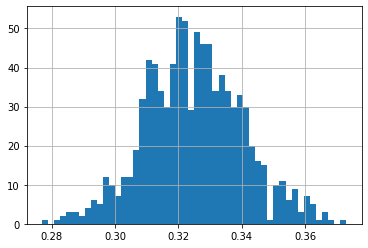

In [17]:
df1['OBP'].hist(bins=50)

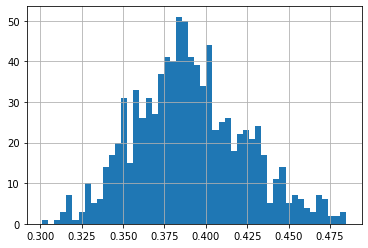

In [18]:
df1['SLG'].hist(bins=50)

In [0]:
df_playoff=df1.groupby('Playoffs')
df_playoff_0=df_playoff.get_group(0)
df_playoff_1=df_playoff.get_group(1)


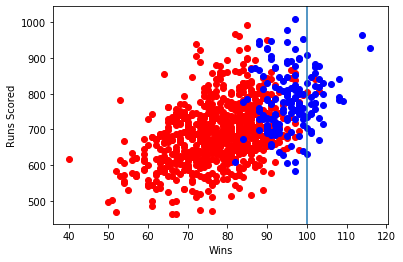

In [20]:
# Plotting scatterplotplt.
#figure(figsize=(10,8))
plt.scatter(x=df_playoff_0.W,y = df_playoff_0.RS,c="red")
plt.scatter(x=df_playoff_1.W,y = df_playoff_1.RS,c="blue")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 100)

From the above plot we see that DePodesta’s estimate of 99 wins makes sense since there appears to be only 3 observations (red) who haven’t made it to the playoffs with ≥ 99 wins.

DePodesta also calculated that the A’s need to score atleast 814 runs and allow only 645 runs in order to make it to the postseason. That meant that the difference between runs scored and runs allowed needed to be approximately 169(RD). Let us look at the relationship between RD and Wins.

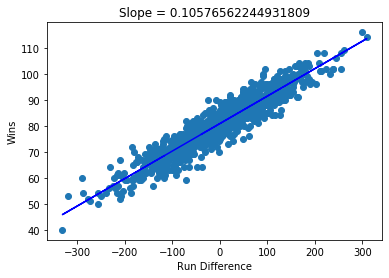

In [21]:
#figure(figsize=(10,8))
x = np.array(df1.RD)
y = np.array(df1.W)# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]#Plotting the figureplt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.show()

In [22]:
print(np.corrcoef(x,y))

[[1.         0.93851498]
 [0.93851498 1.        ]]


In [0]:
#https://en.wikipedia.org/wiki/On-base_percentage
#Batting Average = Hits/At Bat

OBP, SLG and AVG are strong indicators of runs scored by the particular team.
Let us validate these assumptions by plotting the relationship between each of these variables with RS(Runs scored)

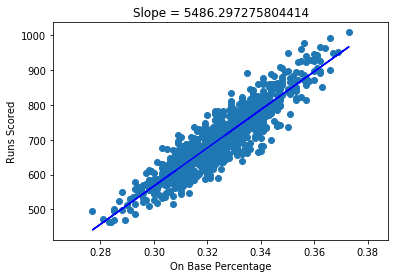

In [25]:
#figure(figsize=(10,8))
x = np.array(df1.OBP)
y = np.array(df1.RS)# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]#Plotting the figureplt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("On Base Percentage")
plt.ylabel("Runs Scored")
plt.show()

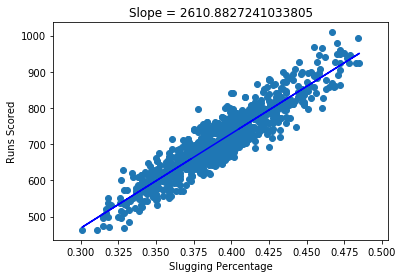

In [26]:
#figure(figsize=(10,8))
x = np.array(df1.SLG)
y = np.array(df1.RS)# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]#Plotting the figureplt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Slugging Percentage")
plt.ylabel("Runs Scored")
plt.show()

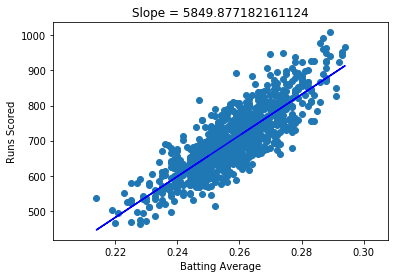

In [27]:
#figure(figsize=(10,8))
x = np.array(df1.BA)
y = np.array(df1.RS)# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]#Plotting the figureplt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Batting Average")
plt.ylabel("Runs Scored")
plt.show()

In [28]:
print(np.corrcoef(df1.OBP,df1.RS))

[[1.         0.90490915]
 [0.90490915 1.        ]]


In [29]:
print(np.corrcoef(df1.SLG,df1.RS))

[[1.         0.92638433]
 [0.92638433 1.        ]]


In [30]:
print(np.corrcoef(df1.BA,df1.RS))

[[1.         0.83162475]
 [0.83162475 1.        ]]


Similarly, we can hypothesise that OOBP(Opponent’s OBP) and OSLG(Opponent’s SLG) have a similar relationship with RA(Runs allowed).

DATA CLEANING: There are a few missing values in the OOBP and OSLG columns. We have to remove these rows of observations in order to plot a proper relationship

In [31]:
for col in df1.columns:
  df1[col]=df1[col].fillna(df1[col].dropna().sample().iloc[0])

#df2=df1.dropna()
#df2.shape



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Our first model is used to predict ‘runs scored’. Our independent variables as on-base percentage, slugging percentage, batting average.

In [32]:
from sklearn.linear_model import LinearRegression
# Extracting our variables from the dataframe.
x = df1[['OBP','SLG']].values
y = df1[['RS']].values# Calling our model object.
RS_model = LinearRegression()# Fitting the model.
RS_model.fit(x,y)
# Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)

[-804.62706106]
[[2737.76802227 1584.90860546]]


In [33]:
x.shape

(902, 2)

In [0]:
#rs_pred=RS_model.predict(x)


In [34]:
RS_model.score(x,y)

0.9295810608096599

Thus, our model is of the following form:

RS = -804.63+2737.77×(OBP)+1584.91×(SLG)

Similarly, we build a model for ‘runs allowed’ using opponent’s on-base percentage and opponent’s slugging percentage as independent variables:

In [35]:
# Extracting our variables from the dataframe.
x = df1[['OOBP','OSLG']].values
y = df1[['RA']].values# Calling our model object.
RA_model = LinearRegression()# Fitting the model.
RA_model.fit(x,y)# Printing model intercept and coefficients.
print(RA_model.intercept_)
print(RA_model.coef_)

[-974.65204347]
[[3246.98738682 1558.81567433]]


In [36]:
RA_model.score(x,y)

0.21126568726733352

model for predicting wins from runs difference:

In [37]:
# Extracting our variables from the dataframe.
x = df1[['RD']].values
y = df1[['W']].values# Calling our model object.
W_model = LinearRegression()# Fitting the model.
W_model.fit(x,y)# Printing model intercept and coefficients.
print(W_model.intercept_)
print(W_model.coef_)

[80.88137472]
[[0.10576562]]


In [38]:
W_model.score(x,y)

0.8808103719972755

Model Predictions

Here are the Oakland Athletics statistics in 2001 before the playoffs.

OBP: 0.339

SLG: 0.430

OOBP: 0.307

OSLG: 0.373
Lets plug in these values into the above models to generate predictions.

In [39]:
# Prediction for runs scored.
RS_model.predict([[0.339,0.430]])


array([[804.98699884]])

In [40]:
RA_model.predict([[0.307,0.373]])


array([[603.6113308]])

In [41]:
802.44299884-627.63977268

174.80322616

In [42]:
W_model.predict([[174.80322616]])

array([[99.36954674]])

Actual is 103, Our results are very close to the actual. This deviation is due to high level imputation done for missing values 